# РК№2 Вариант 27 Линейная/логистическая регрессия	Случайный лес
## Смирнов Д.И. ИУ5Ц-81Б

https://www.kaggle.com/datasets/roysouravcu/forbes-billionaires-of-2021/code

In [11]:
# библиотеки
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
# Загрузка данных
data = pd.read_csv('Billionaire.csv')


Выведем данные и очистим нулевые значения

In [12]:
data.head()


,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology


In [13]:
data.isnull().sum()

Name         0
NetWorth     0
Country      0
Source       0
Rank         0
Age         79
Industry     0
dtype: int64

In [14]:
data=data.dropna()
data.isnull().sum()

Name        0
NetWorth    0
Country     0
Source      0
Rank        0
Age         0
Industry    0
dtype: int64

Преобразование данных

In [15]:
data["NetWorth"] = data["NetWorth"].str.strip("$")
data["NetWorth"] = data["NetWorth"].str.strip(" B")
data["NetWorth"] = data["NetWorth"].astype(float)


In [16]:

data.head()

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology


### Проведем кодирование категориальных признаков и масштабирование данных

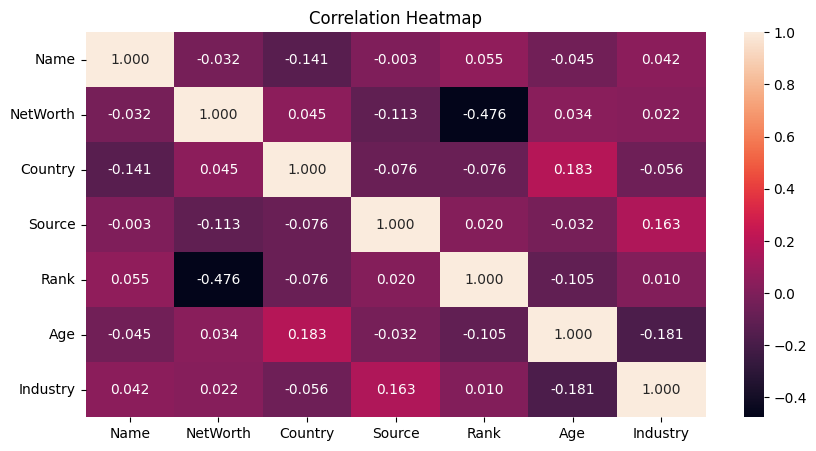

In [25]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
le = LabelEncoder()
le.fit(data['Name'].drop_duplicates()) 
data['Name'] = le.transform(data['Name'])

le.fit(data['Country'].drop_duplicates()) 
data['Country'] = le.transform(data['Country'])

le.fit(data['Source'].drop_duplicates()) 
data['Source'] = le.transform(data['Source'])

le.fit(data['Industry'].drop_duplicates()) 
data['Industry'] = le.transform(data['Industry'])

# Масштабирование данных
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Построение тепловой карты корреляции
plt.figure(figsize=(10, 5))
sns.heatmap(data.corr(method='pearson'), annot=True, fmt='.3f')
plt.title('Correlation Heatmap')
plt.show()


In [26]:
data.head()

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,1015,177.0,66,6,1,57.0,16
1,598,151.0,66,143,2,49.0,0
2,221,150.0,16,86,3,72.0,4
3,238,124.0,66,96,4,65.0,16
4,1521,97.0,66,48,5,36.0,16


### Линейная регрессия целевого признака Rank

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score

# Определение признаков и целевой переменной
X = data.drop(columns=['Rank'])  # Все признаки, кроме Rank
y = data['Rank']  # Целевая переменная - Rank

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Создание и обучение модели линейной регрессии
lr = LinearRegression()
lr.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred_lr = lr.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, y_pred_lr)
print(f"Модель линейной регрессии: Среднеквадратичная ошибка (MSE) = {mse}")


Модель линейной регрессии: Среднеквадратичная ошибка (MSE) = 426276.07910038956


### Случайный лес

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Создание и обучение модели случайного леса
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred_rf = rf.predict(X_test)

# Оценка модели
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)

print(f"Случайный лес: Средняя абсолютная ошибка (MAE) = {mae}, Среднеквадратичная ошибка (MSE) = {mse}")

Случайный лес: Средняя абсолютная ошибка (MAE) = 0.16281716417910466, Среднеквадратичная ошибка (MSE) = 0.2759953358208952


Исходя из этих результатов, можно сделать вывод, что модель случайного леса предпочтительнее для данной задачи предсказания ранга миллиардеров по сравнению с моделью линейной регрессии.